<a href="https://colab.research.google.com/github/picklehari/MalayalamHandwritingRecognition/blob/master/Malayalam_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a Neural Net Model for Alphabets

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Importing Libraries. Inital try with fastai libraries.

In [0]:
from fastai import *
from fastai.vision import *
from fastai import callbacks
from fastai.metrics import error_rate

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


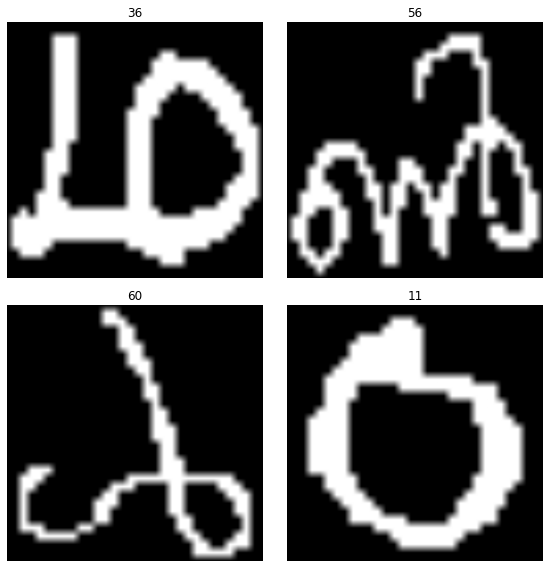

In [0]:
path = "/content/gdrive/My Drive/Data/"
# tfms = ([*rand_pad(padding=1,size=32,mode='zeros')],[])
np.random.seed(52)
data = ImageDataBunch.from_folder(path,ds_tfms=None,size=1024,bs=4).normalize()
data.show_batch(rows=3)

In [0]:
learn = cnn_learner(data, models.vgg16_bn, metrics=accuracy,pretrained=False,callback_fns=[partial(callbacks.EarlyStoppingCallback, monitor='accuracy', min_delta=0.01, patience=3)])


In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-06
Min loss divided by 10: 1.58E-05


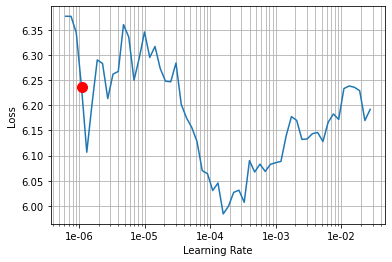

In [0]:
learn.recorder.plot(suggestion=True,show_grid=True,skip_end=20)

In [0]:
path = "/content/gdrive/My Drive/Handwriting Models"
learn.path = Path(path)

In [0]:
learn.fit_one_cycle(10,max_lr=slice(1.1e-06,2e-04))
learn.export("vgg_19_non_trained.pkl")

epoch,train_loss,valid_loss,accuracy,time
0,4.301145,3.007504,0.238346,1:06:28
1,3.741015,2.346504,0.412198,1:06:30
2,3.048227,1.906319,0.526113,1:06:32


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.path = Path(".")
learn.export("MalHand_18.pkl")

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
pth = Path(".")
img = open_image(pth/"1344.png") 
img

FileNotFoundError: ignored

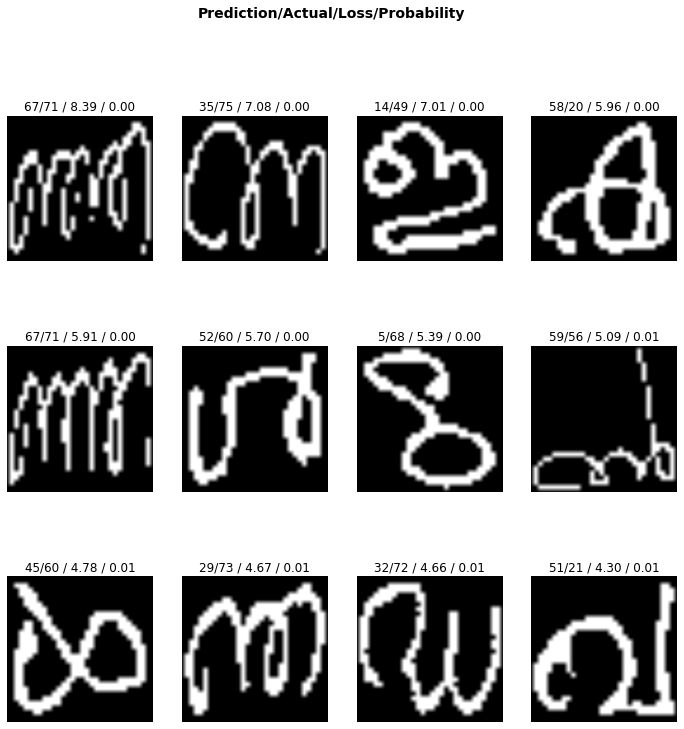

In [0]:
interp.plot_top_losses(12)

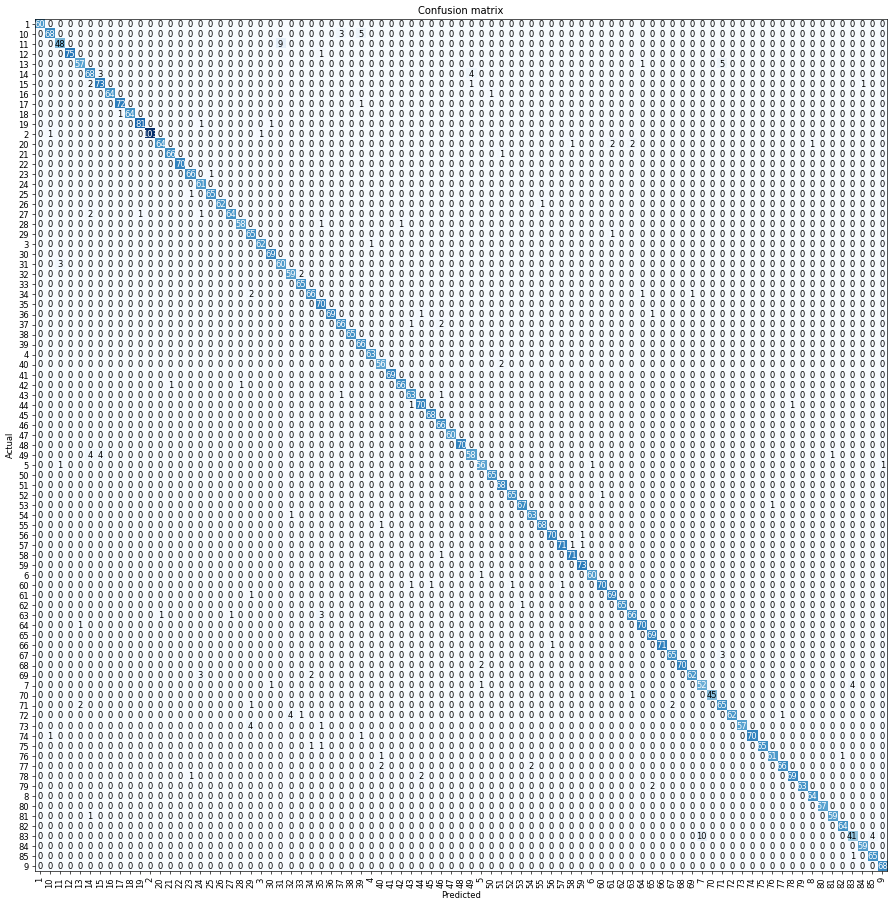

In [0]:
interp.plot_confusion_matrix(figsize = (15,15),dpi=60)

In [0]:
interp.most_confused(min_val= 3)

[('83', '7', 10),
 ('11', '31', 9),
 ('10', '39', 5),
 ('13', '71', 5),
 ('14', '49', 4),
 ('49', '14', 4),
 ('49', '15', 4),
 ('7', '83', 4),
 ('72', '32', 4),
 ('73', '29', 4),
 ('83', '85', 4),
 ('10', '37', 3),
 ('14', '15', 3),
 ('31', '11', 3),
 ('63', '35', 3),
 ('67', '71', 3),
 ('69', '24', 3)]

In [0]:
top_losses,top_idx = interp.top_losses()

NameError: ignored

In [0]:
learn = load_learner( = path'.',file="MalHand_18.pkl")

In [0]:
learn.lr_find()
# learn.recorder.plot()

ZeroDivisionError: ignored

In [0]:
learn.recorder.plot()

AttributeError: ignored

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,4.179288,4.587296,0.086050,25:01
1,4.207184,6.845227,0.086926,24:57
